# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [6]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t', index_col=0)

### Step 3. Assign it to a variable called chipo.

In [11]:
chipo=chipo.reset_index()

### Step 4. See the first 10 entries

In [12]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

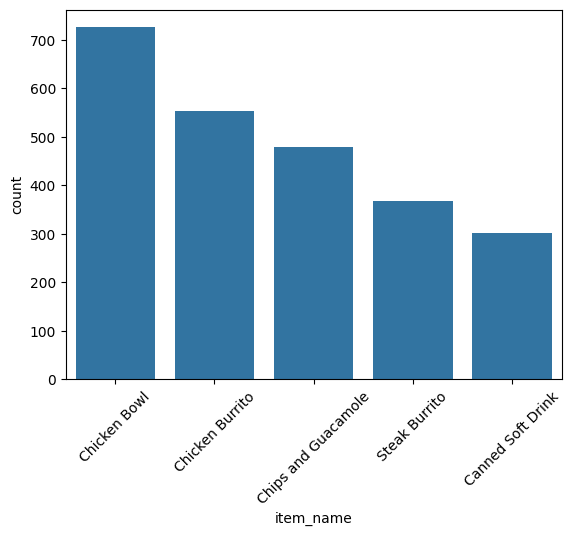

In [25]:
import seaborn as sns
top_items = chipo['item_name'].value_counts().sort_values(ascending=False).head(5)
sns.barplot(top_items)
plt.xticks(rotation=45)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [30]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


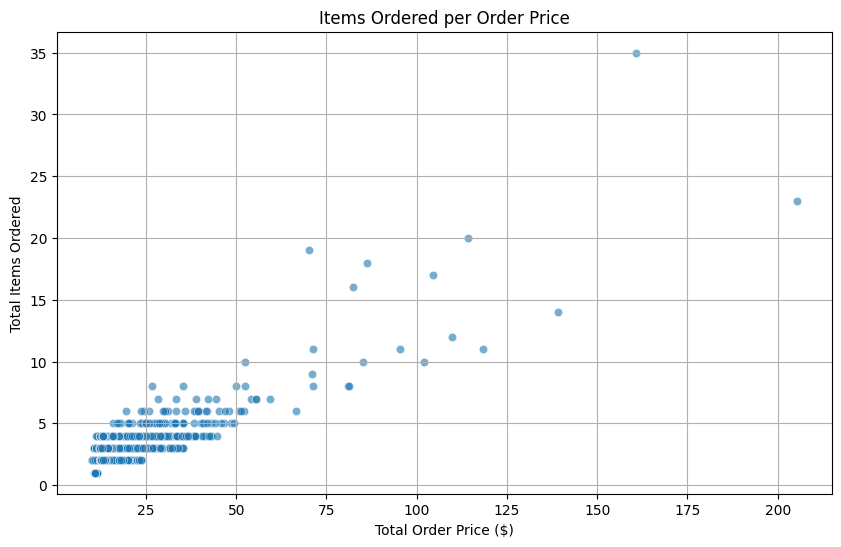

In [34]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
order_summary = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_summary, x='item_price', y='quantity', alpha=0.6)
plt.title('Items Ordered per Order Price')
plt.xlabel('Total Order Price ($)')
plt.ylabel('Total Items Ordered')
plt.grid(True)
plt.show()


In [35]:
order_summary

,order_id,item_price,quantity
0,1,11.56,4
1,2,16.98,2
2,3,12.67,2
3,4,21.00,2
4,5,13.70,2
...,...,...,...
1829,1830,23.00,2
1830,1831,12.90,3
1831,1832,13.20,2
1832,1833,23.50,2


### Step 7. BONUS: Create a question and a graph to answer your own question.

"가장 많은 수익을 올린 아이템은 무엇일까?"


In [39]:
revenue_per_item

,revenue
item_name,
Chicken Bowl,8044.63
Chicken Burrito,6387.06
Steak Burrito,4236.13
Steak Bowl,2479.81
Chips and Guacamole,2475.62


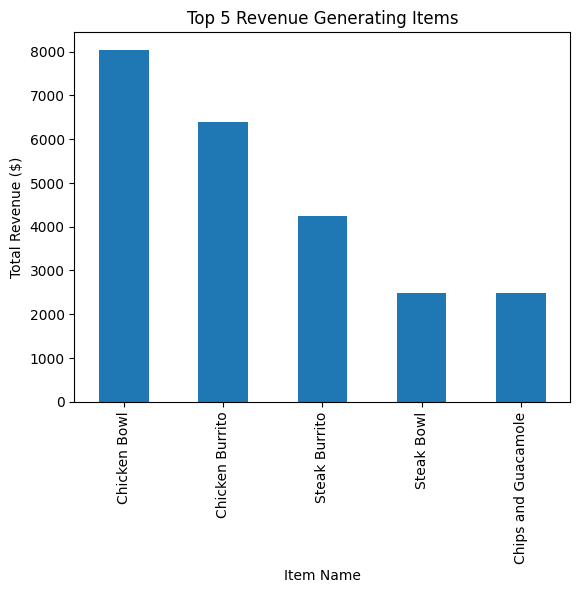

In [41]:
# 각 아이템 별로 총 수익을 계산합니다.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
revenue_per_item = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(5)

# 그래프를 출력합니다.
revenue_per_item.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.title('Top 5 Revenue Generating Items')
plt.show()